# Statistiche CalenPIario

https://www.rimosco.it/picalendar/index.php?a=list

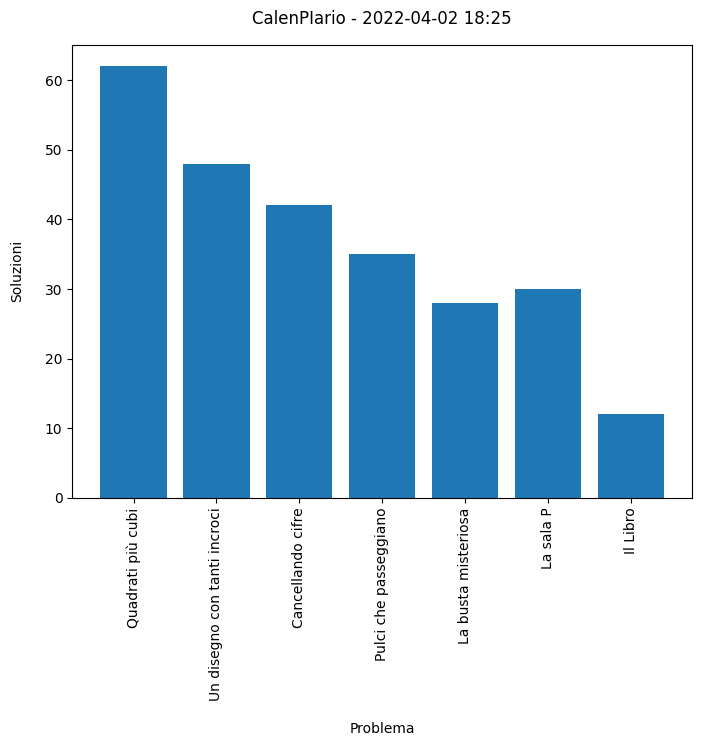

In [24]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.rimosco.it/picalendar/index.php?a=list'

r = requests.get(url)
pical_problems = BeautifulSoup(r.text, 'html.parser')

data = [ [l.split(" (Risolto ")[0],int(l.split(" (Risolto ")[1])] 
        for l in pical_problems.text.split("\n")[20].split(" volte)")[:-1] ]

import matplotlib.pyplot as plt
import numpy as np
import datetime 

now = str(datetime.datetime.now())[:16]

labels = [ l[0] for l in np.array(data)[:,0:1] ]
values = [ int(l[0]) for l in np.array(data)[:,1:] ]
labels,values

fig, ax = plt.subplots(figsize=(8,6),dpi=100)

plt.bar(labels,values)
plt.xticks(range(len(labels)), labels, rotation='vertical')

ax.set_xlabel('Problema', labelpad=15)
ax.set_ylabel('Soluzioni', labelpad=15)
ax.set_title('CalenPIario - {}'.format(now), pad=15)

plt.show()